In [1]:
# Package import
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
# Ignore all warnings (not recommended for production code)
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",module="tensorflow")
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 2870 files belonging to 4 classes.
Found 394 files belonging to 4 classes.
Classes list :  ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.
Classes:  {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
x_train shape: (1435, 256, 256, 3)
y_train shape: (1435, 4)
x_test shape: (1435, 256, 256, 3)
y_test shape: (1435, 4)


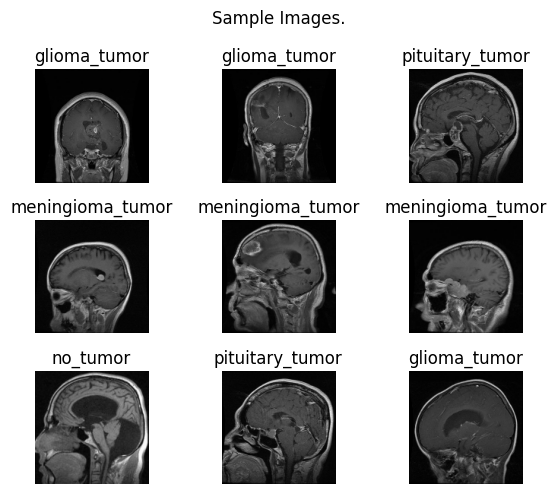

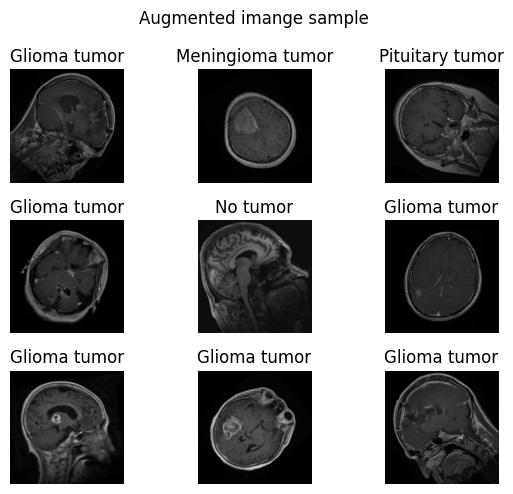

In [3]:
# pre_proccesing file as Custom module
from drive.MyDrive.ColabNotebooks.Final_Copy import pre_Proccesing
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import trainingModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import evaluatePerfomanceOfModel
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPerformance
from drive.MyDrive.ColabNotebooks.Final_Copy.pre_Proccesing import modelPrediction

In [4]:
# Splited Dataset into x_train, y_train, x_test, y_test
x_trian = pre_Proccesing.x_train
y_train = pre_Proccesing.y_train
x_test  = pre_Proccesing.x_test
y_test  = pre_Proccesing.y_test

In [5]:
#Initialize variable shapes with the input shape.
shapes = (256, 256, 3)

# Initialize variable input_layars with shape (256, 256, 3)
input_Layers = layers.Input(shape = shapes, name='inputShape')

# Defining a layers of models
conv_1 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', name='conv_1')(input_Layers)
conv_2 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', name='conv_2')(conv_1)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_2)
drop_1 = layers.Dropout(0.1)(pool_1)

conv_3 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='conv_3')(drop_1)
conv_4 = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='conv_4')(conv_3)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_4)
drop_2 = layers.Dropout(0.1)(pool_2)

seq_Layer = Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='conv_5'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='conv_6'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_3'),
    layers.Dropout(0.1),

    layers.Conv2D(filters=258, kernel_size=(3, 3), activation='relu', padding='same', name='conv_7'),
    layers.Conv2D(filters=258, kernel_size=(3, 3), activation='relu', padding='same', name='conv_8'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_4'),
    layers.Dropout(0.1),

    layers.Flatten(name='flatten'),
    layers.Dense(units=512, activation='relu', name='fc_1'),
    layers.Dense(units=4, activation='softmax', name='Output')
])
outputs = seq_Layer(drop_1)
# Defining a models
cnn_Model = models.Model(inputs=input_Layers, outputs=outputs, name='CNN_Model_Version_2')

cnn_Model.save('CNN_Model')
# Model summary
cnn_Model.summary()

Model: "CNN_Model_Version_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputShape (InputLayer)     [(None, 256, 256, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv_2 (Conv2D)             (None, 256, 256, 32)      9248      
                                                                 
 pool_1 (MaxPooling2D)       (None, 128, 128, 32)      0         
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 sequential (Sequential)     (None, 4)                 136350252 
                                                                 
Total params: 136,360,396
Trainable params: 136

In [6]:
# Declaration of optimizer, loss_function and metrics_acc
optimizer     = optimizers.Adam(learning_rate=0.001)
loss_function = 'categorical_crossentropy'
metrics_acc   = ['accuracy']
epochs = 10

# Compiling and training CNN model
history_CNN = trainingModel(cnn_Model,optimizer,loss_function, metrics_acc,x_trian,y_train,x_test,y_test, epochs)

Epoch 1/10
45/45 [==============================] - 53s 681ms/step - loss: 1.3370 - accuracy: 0.4098 - val_loss: 1.2959 - val_accuracy: 0.4258
Epoch 2/10
45/45 [==============================] - 20s 448ms/step - loss: 1.0594 - accuracy: 0.5296 - val_loss: 1.0023 - val_accuracy: 0.5561
Epoch 3/10
45/45 [==============================] - 20s 446ms/step - loss: 0.9266 - accuracy: 0.5909 - val_loss: 1.0370 - val_accuracy: 0.5345
Epoch 4/10
45/45 [==============================] - 22s 486ms/step - loss: 0.8465 - accuracy: 0.6188 - val_loss: 0.9821 - val_accuracy: 0.5868
Epoch 5/10
45/45 [==============================] - 20s 447ms/step - loss: 0.7316 - accuracy: 0.6767 - val_loss: 0.9835 - val_accuracy: 0.5882
Epoch 6/10
45/45 [==============================] - 20s 450ms/step - loss: 0.5759 - accuracy: 0.7638 - val_loss: 1.1383 - val_accuracy: 0.6021
Epoch 7/10
45/45 [==============================] - 20s 449ms/step - loss: 0.4005 - accuracy: 0.8314 - val_loss: 1.3641 - val_accuracy: 0.6195

CNN model Test Loss:  2.915415048599243
CNN model Test Accuracy 0.604181170463562


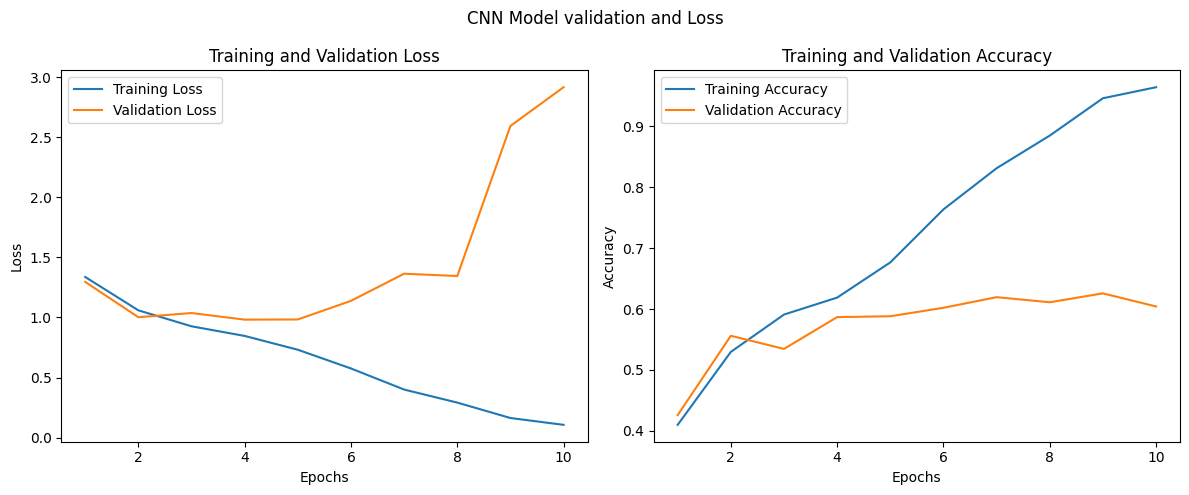

In [7]:
# evaluating result from a CNN model Test Loss and Accuracy of Model
evaluatePerfomanceOfModel(cnn_Model, x_test, y_test, epochs, history_CNN)

45/45 [==============================] - 4s 75ms/step


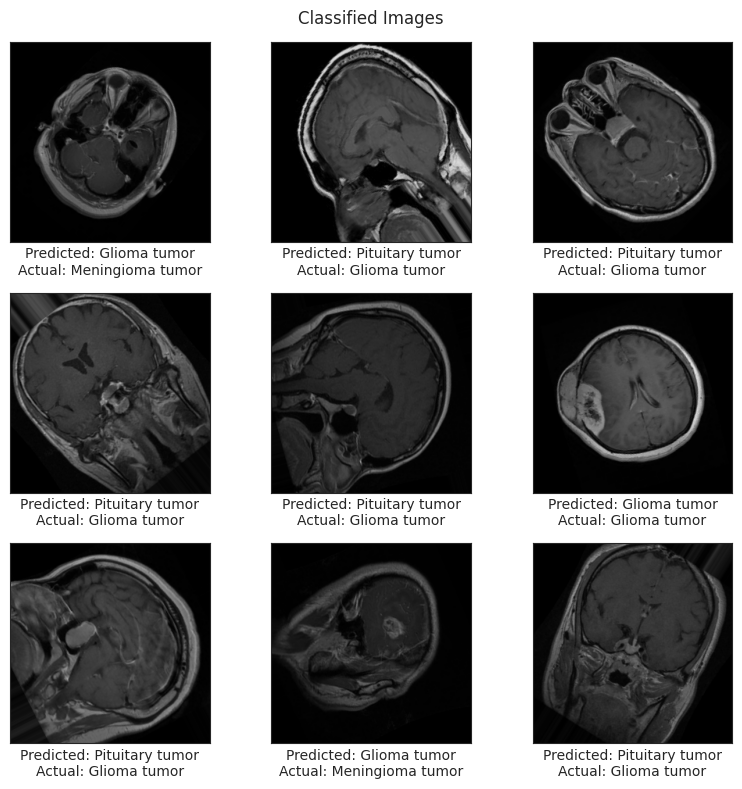

In [8]:
# Prediction using CNN model
modelPrediction(cnn_Model,x_test, y_test)

45/45 [==============================] - 3s 74ms/step
                  precision    recall  f1-score   support

    Glioma tumor       0.61      0.59      0.60       401
Meningioma tumor       0.59      0.36      0.45       413
        No tumor       0.56      0.55      0.56       208
 Pituitary tumor       0.62      0.89      0.73       413

        accuracy                           0.60      1435
       macro avg       0.60      0.60      0.58      1435
    weighted avg       0.60      0.60      0.59      1435



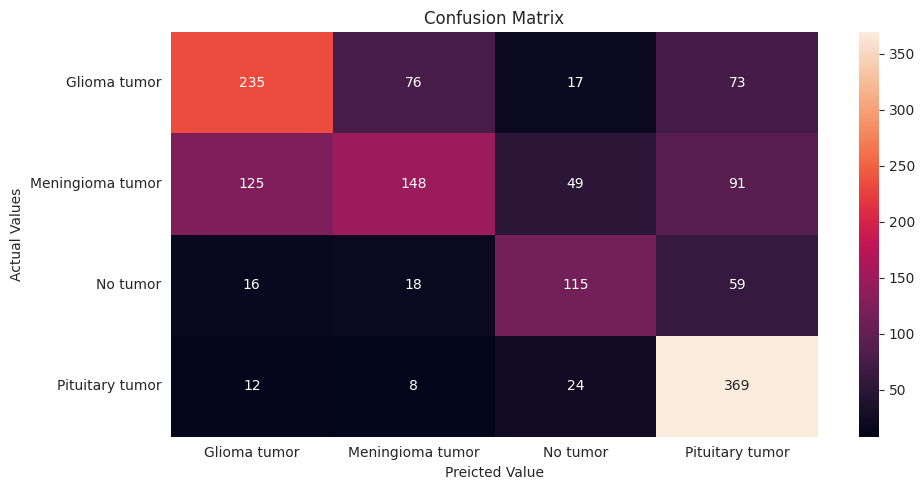

In [9]:
# Permomance of the model confusion Metrix
modelPerformance(cnn_Model, x_test, y_test)

In [10]:
# Initialize variable shapes with the input shape.
shapes = (256, 256, 3)

# Initialize variable input_layars with shape (256, 256, 3)
modified_CNN_Model = Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides = (1,1), name='conv_1', input_shape = shapes),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', strides = (1,1), name='conv_2'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_1'),
    layers.Dropout(0.1),

    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',strides = (1,1), padding='same', name='conv_3'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu',strides = (1,1), padding='same', name='conv_4'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_2'),
    layers.Dropout(0.1),

    layers.Conv2D(filters=258, kernel_size=(3, 3), activation='relu', strides = (1,1),padding='same', name='conv_5'),
    layers.Conv2D(filters=258, kernel_size=(3, 3), activation='relu', strides = (1,1),padding='same', name='conv_6'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_3'),
    layers.Dropout(0.1),

    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', strides = (2,2),name='conv_7'),
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same', strides = (2,2),name='conv_8'),
    layers.MaxPooling2D(pool_size=(2, 2), name='pool_4'),
    layers.Dropout(0.1),

    layers.Flatten(name='flatten'),
    layers.Dense(units=512, activation='relu', name='fc_1'),
    layers.Dense(units=4, activation='softmax', name='Output')
])

# Defining a models
modified_CNN_Model.save('CNN_Model_Modified')

# Model summary
modified_CNN_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv_2 (Conv2D)             (None, 256, 256, 64)      36928     
                                                                 
 pool_1 (MaxPooling2D)       (None, 128, 128, 64)      0         
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 64)      0         
                                                                 
 conv_3 (Conv2D)             (None, 128, 128, 128)     73856     
                                                                 
 conv_4 (Conv2D)             (None, 128, 128, 128)     147584    
                                                                 
 pool_2 (MaxPooling2D)       (None, 64, 64, 128)      

In [11]:
# Declaration of optimizer, loss_function and metrics_acc
optimizer     = optimizers.SGD(learning_rate=0.001, momentum = 0.9)
loss_function = 'categorical_crossentropy'
metrics_acc   = ['accuracy']
epochs = 10

# Compiling and training CNN model
history_modified_CNN_Model = trainingModel(modified_CNN_Model,optimizer,loss_function, metrics_acc,x_trian,y_train,x_test,y_test, epochs)

Epoch 1/10
45/45 [==============================] - 47s 865ms/step - loss: 1.3786 - accuracy: 0.3359 - val_loss: 1.3711 - val_accuracy: 0.4606
Epoch 2/10
45/45 [==============================] - 30s 678ms/step - loss: 1.3613 - accuracy: 0.4251 - val_loss: 1.3593 - val_accuracy: 0.4139
Epoch 3/10
45/45 [==============================] - 31s 682ms/step - loss: 1.3498 - accuracy: 0.4125 - val_loss: 1.3518 - val_accuracy: 0.4369
Epoch 4/10
45/45 [==============================] - 31s 684ms/step - loss: 1.3412 - accuracy: 0.4272 - val_loss: 1.3459 - val_accuracy: 0.5038
Epoch 5/10
45/45 [==============================] - 30s 679ms/step - loss: 1.3323 - accuracy: 0.4439 - val_loss: 1.3352 - val_accuracy: 0.4530
Epoch 6/10
45/45 [==============================] - 30s 678ms/step - loss: 1.3169 - accuracy: 0.4258 - val_loss: 1.3146 - val_accuracy: 0.4990
Epoch 7/10
45/45 [==============================] - 31s 682ms/step - loss: 1.2819 - accuracy: 0.4801 - val_loss: 1.2558 - val_accuracy: 0.4906

CNN model Test Loss:  1.1904360055923462
CNN model Test Accuracy 0.4947735071182251


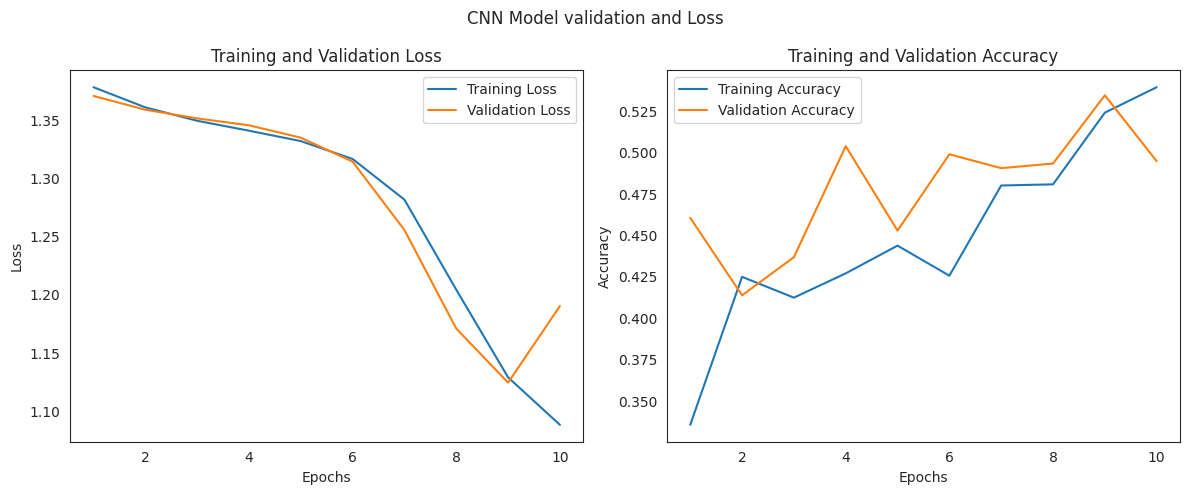

In [13]:
#evaluating result from a CNN model Test Loss and Accuracy of Model
evaluatePerfomanceOfModel(modified_CNN_Model, x_test, y_test,epochs, history_modified_CNN_Model)

45/45 [==============================] - 5s 112ms/step


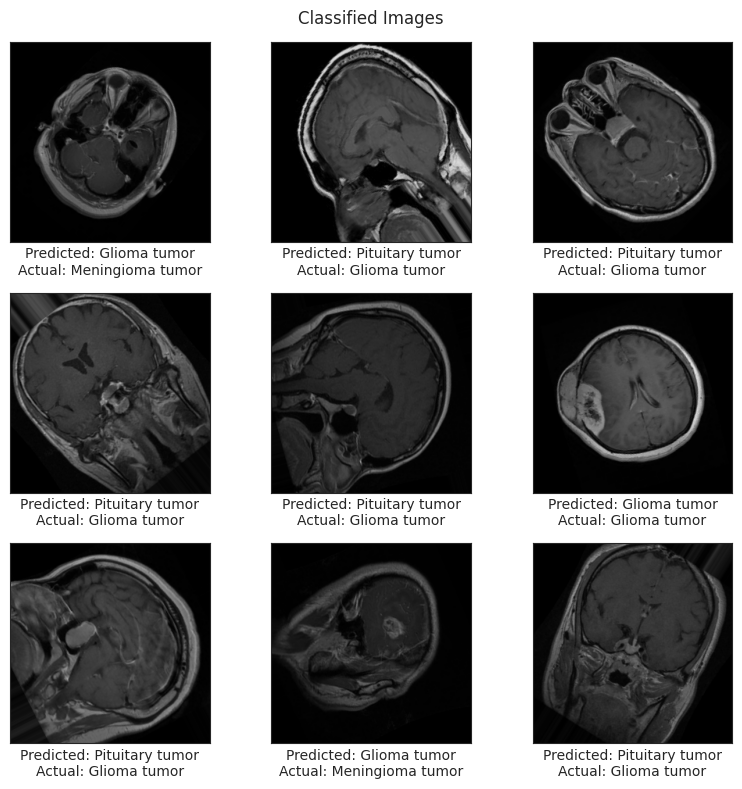

In [14]:
# Prediction using CNN model
modelPrediction(modified_CNN_Model,x_test, y_test)

45/45 [==============================] - 5s 111ms/step
                  precision    recall  f1-score   support

    Glioma tumor       0.50      0.66      0.57       401
Meningioma tumor       0.55      0.07      0.13       413
        No tumor       0.78      0.09      0.16       208
 Pituitary tumor       0.48      0.96      0.64       413

        accuracy                           0.49      1435
       macro avg       0.58      0.45      0.37      1435
    weighted avg       0.55      0.49      0.40      1435



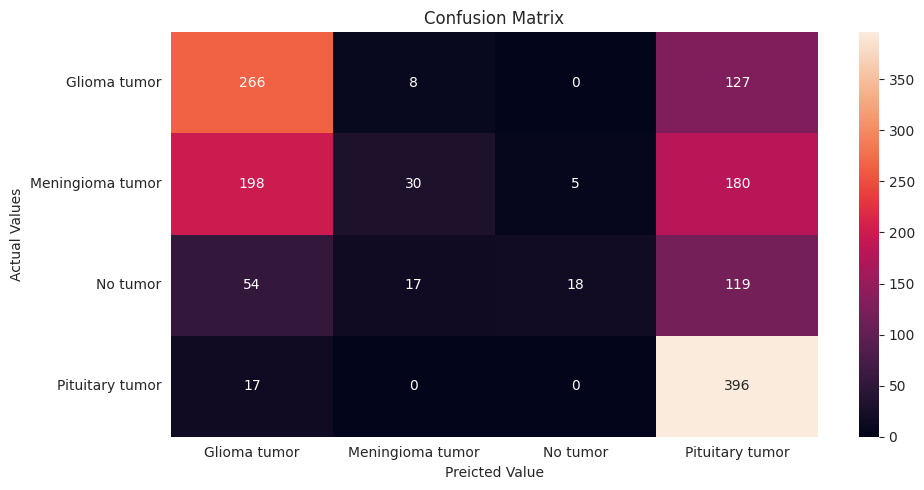

In [15]:
# Permomance of the model
modelPerformance(modified_CNN_Model, x_test, y_test)